In [1]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from itertools import cycle

def getSize(instance):
    return int(''.join([c for c in instance if c in [str(n) for n in range(10)]]))

In [2]:

instances = [l.replace(".tsp\n", "") for l in open("mailist-agrvai")]
print(instances)

top_dir = os.path.abspath("./mlp_tudao/")
mid_dir = os.path.abspath("./mlp_tudao_mid/")
naive_dir = os.path.abspath("./mlp_tudao_naive/")

files = [join(top_dir, f) for f in listdir(top_dir) if isfile(join(top_dir, f)) and f.endswith(".csv")]
files.extend([join(mid_dir, f) for f in listdir(mid_dir) if isfile(join(mid_dir, f)) and f.endswith(".csv")])
files.extend([join(naive_dir, f) for f in listdir(naive_dir) if isfile(join(naive_dir, f)) and f.endswith(".csv")])
#print(files)

resultsKeys = ['COST', 'TIME', 'mem_avg', 'mem_max']
#branches = ["main", "mid", "naive"]

df = pd.DataFrame()
data = {}
for f in files:
    sources = []
    branches = []
    
    if df.empty:
        df = pd.read_csv(f)
    else:
        df = pd.concat([df, pd.read_csv(f)], ignore_index=True)
        
#print(df)

for s in df['source']:
    if s not in sources:
        sources.append(s)

for b in df['branch']:
    if b not in branches:
        branches.append(b)

print(sources)
        
for b in branches:
    data[b] = {}
    for s in sources:
        data[b][s] = {}
        #data_sbc_tempo[s] = {}
        #data_sbc_mem[s] = {}
        for inst in instances:
            with pd.option_context('display.float_format', '{:0.3f}'.format):
                #mean = df[df['instance'] == inst+'.tsp\n' and df['source'] == s].mean()
                f_df = df[df['instance'] == inst+'.tsp']

                f_df = f_df[f_df['source'] == s]

                f_df = f_df[f_df['branch'] == b]
                #if s == 'rust':
                #print(b, s, inst)


                mean = f_df.mean(numeric_only=True)
                #print("mediaaa", mean)

                data[b][s][inst] = mean
                #data_sbc_tempo[s][inst] = mean["TIME"].round(3)
                #data_sbc_mem[s][inst] = mean["mem_avg"].round(3)


                

print(data['naive']['c']['att48'])
    

['att48', 'berlin52', 'brazil58', 'dantzig42', 'eil101', 'eil51', 'eil76', 'gr48', 'gr96', 'kroA100', 'lin105', 'pr107', 'pr76', 'rat99', 'rd100', 'st70', 'swiss42']
['golang', 'python3', 'pypy', 'dotnet', 'node', 'c', 'cpp-OOP', 'lua', 'luajit', 'julia', 'cpp', 'matlab', 'fortran', 'java', 'rust', 'cppOOP']
COST           209320.000000
TIME                0.284817
mem_avg             0.078133
mem_max             0.226562
mem_lookups     17603.000000
dtype: float64


<ipython-input-3-8ed8fd265b62>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


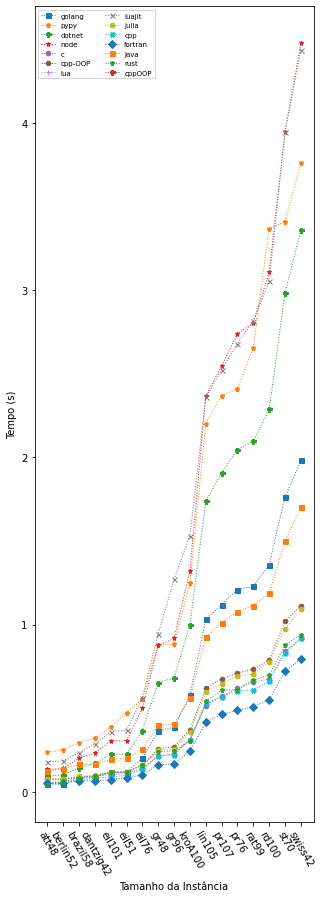

In [3]:
##### TOP LANGS #####

from matplotlib.cm import get_cmap

markers = ["s", "p", "P", "*", "h", "H", "+", "x", "$\U0001F601$", "X", "D"]

markers_cycler = cycle(markers)

axis_x = []
time_y = [] # tempo d fato meu fii
plt.figure(figsize=(5, 15))

data_top = data['main']


for key in data_top.keys():
    lang = data_top[key]
    if key == 'python3' or key == 'matlab':
        continue
    inst_list = []
    time_y = [] # tempo d fato meu fii
    index = []

    for inst in instances:
        size = getSize(inst)
        for i, r in lang[inst].to_frame().iterrows():
            if i == 'TIME':
                index.append(size)
                inst_list.append(inst)
                time_y.append(float(r))
                
                #axis_x.append(f"{inst} / {key}")


    inst_list = [t for _, t in sorted(zip(time_y, inst_list))]
    time_y = sorted(time_y)
    
    x = list(range(0, len(inst_list)))
    plt.xticks(x, inst_list, rotation=-60)
    #plt.semilogy(index, time_y, label=key.replace('.csv', ''))
    plt.plot(x, time_y, label=key.replace('.csv', ''), linestyle=':', marker=next(markers_cycler), markersize=5,  linewidth=1)
    #plt.scatter(index, time_y, s= 6)
    plt.ylabel("Tempo (s)")
    plt.xlabel("Tamanho da Instância")



    plt.legend(loc=2, ncol=2, fontsize=7)



#plt.xlim(95, 205)

plt.savefig('tempo_perdido.pdf')

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


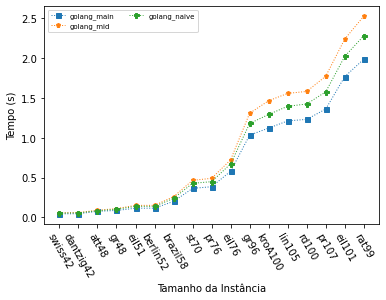

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


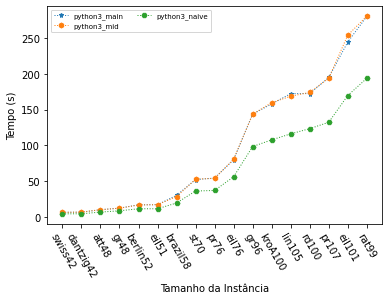

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


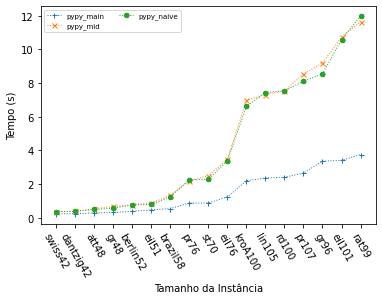

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


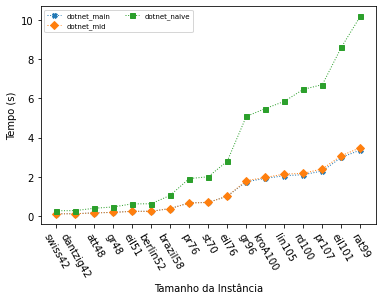

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


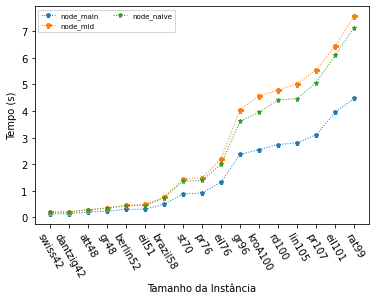

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


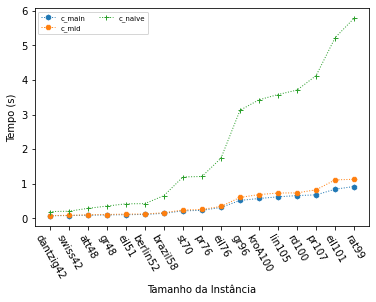

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


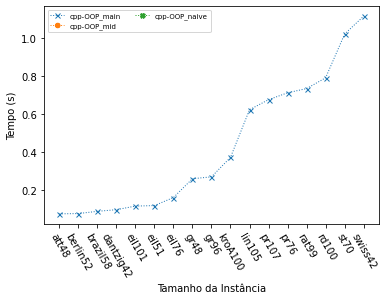

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


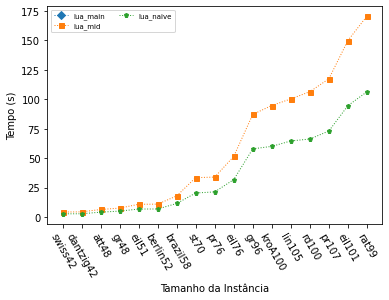

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


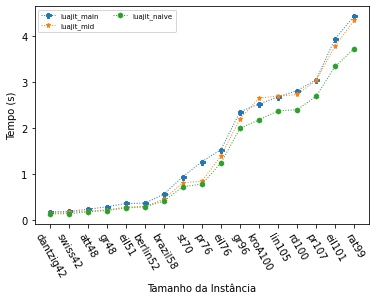

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


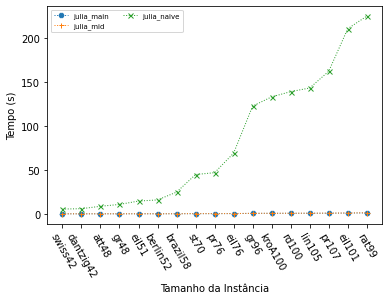

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


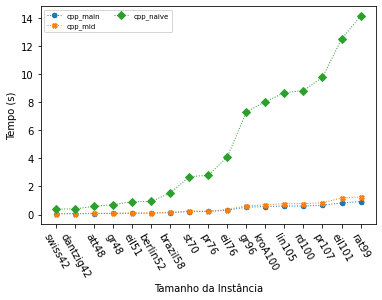

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


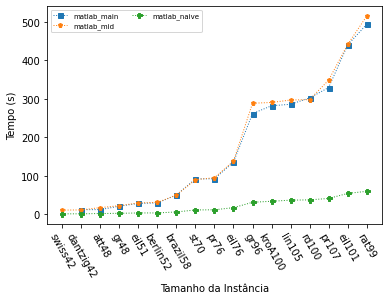

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


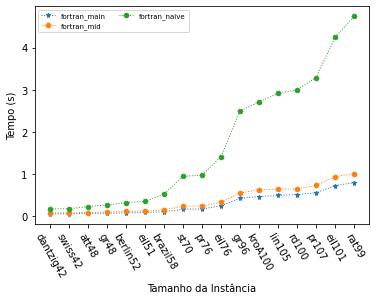

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


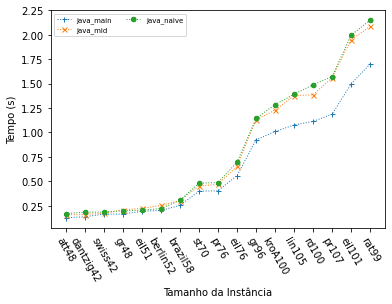

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


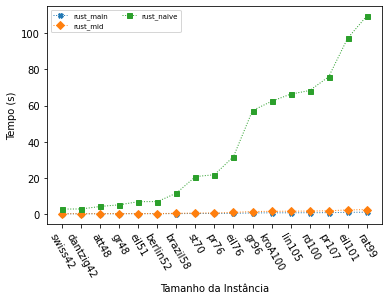

<ipython-input-5-6612e02f15e3>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_y.append(float(r))


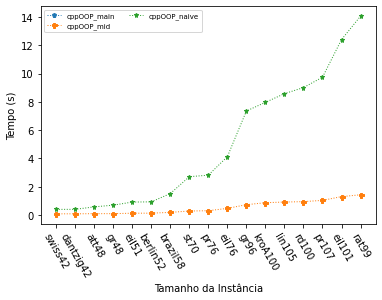

In [5]:
#### COMPARACAO ENTRE BRANCHS EM KDA LANG ####


from matplotlib.cm import get_cmap

markers = ["s", "p", "P", "*", "h", "H", "+", "x", "$\U0001F601$", "X", "D"]

markers_cycler = cycle(markers)

axis_x = []
time_y = [] # tempo d fato meu fii
#plt.figure(figsize=(5, 15))


for key in data['main'].keys():
    for branch in data.keys():
        lang = data[branch][key]
        inst_list = []
        time_y = [] # tempo d fato meu fii
        index = []

        for inst in instances:
            size = getSize(inst)
            for i, r in lang[inst].to_frame().iterrows():
                if i == 'TIME':
                    index.append(size)
                    inst_list.append(inst)
                    time_y.append(float(r))

                    #axis_x.append(f"{inst} / {key}")


        inst_list = [t for _, t in sorted(zip(time_y, inst_list))]
        time_y = sorted(time_y)

        x = list(range(0, len(inst_list)))
        plt.xticks(x, inst_list, rotation=-60)
        #plt.semilogy(index, time_y, label=key.replace('.csv', ''))
        plt.plot(x, time_y, label=key.replace('.csv', '')+"_"+branch, linestyle=':', marker=next(markers_cycler), markersize=5,  linewidth=1)
        #plt.scatter(index, time_y, s= 6)
        plt.ylabel("Tempo (s)")
        plt.xlabel("Tamanho da Instância")



        plt.legend(loc=2, ncol=2, fontsize=7)
    plt.savefig('tempo_perdido'+'_'+key+'.pdf')

    plt.show()



#plt.xlim(95, 205)

